In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Интесивность в центре не 0, как она влияет
# поработать с литературой ссылка
#комплекная амплитуда, сами выделить из нее фазы
# 2 метода 
# 20 мая

In [ ]:
# Метод определения branch_point'ов почти идеально определяет топологический заряд

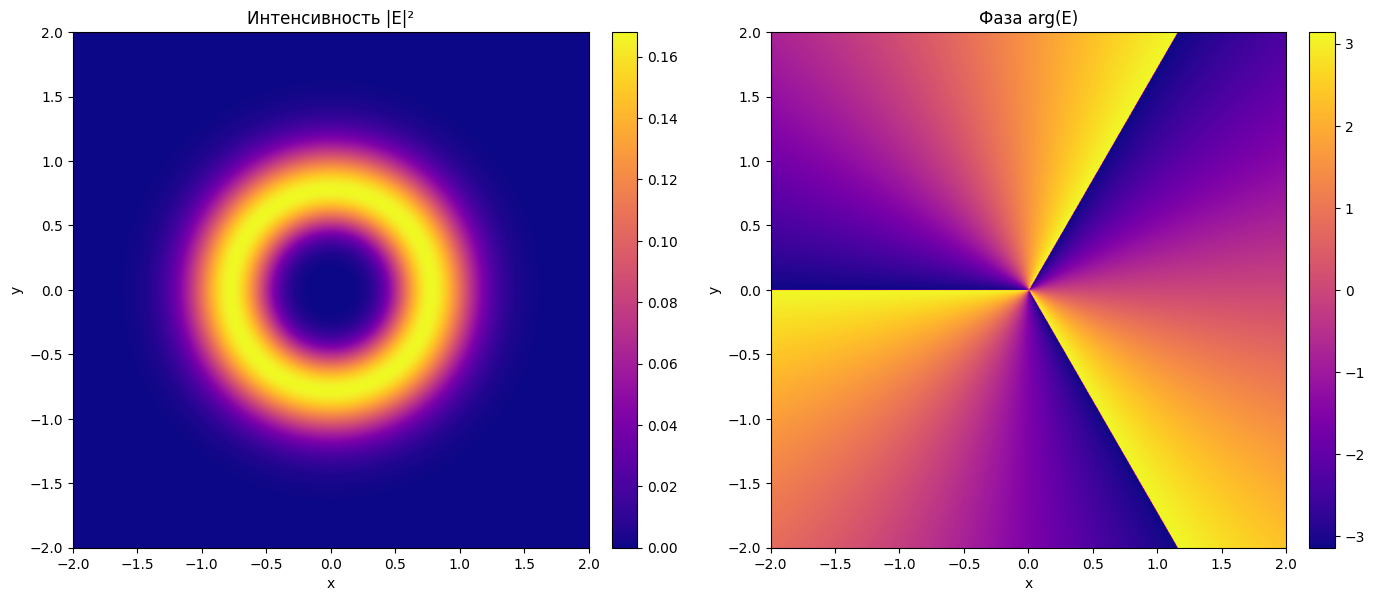

In [4]:
# R^m * e^(-R^2) * e^(i * m * teta)

# Параметры поля
m = 3  # топологический заряд
grid_size = 1000
Edge = np.pi
x = np.linspace(-Edge, Edge, grid_size)
y = np.linspace(-Edge, Edge, grid_size)
X, Y = np.meshgrid(x, y)

# Преобразуем в полярные координаты
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Волновой фронт с фазовым вихрем
amplitude = (R)**abs(m) * np.exp(-R**2)
phase = m * Theta
field = amplitude * np.exp(1j * phase)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(np.abs(field)**2, extent=(-2, 2, -2, 2), cmap='plasma')
axs[0].set_title('Интенсивность |E|²')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(np.angle(field), extent=(-2, 2, -2, 2), cmap='plasma')
axs[1].set_title('Фаза arg(E)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [3]:
def principal_value(x):
    # Приводим значение x в интервал [-pi, pi]
    while x > np.pi:
        x -= 2 * np.pi
    while x <= -np.pi:
        x += 2 * np.pi
    return x

In [6]:
def dfx(z, h):
    z_roll = np.roll(z, -1, axis=1)  # Сдвиг значений влево (с учетом периодичности)
    return (z_roll - z) / h

def dfy(z, h):
    z_roll = np.roll(z, -1, axis=0)  # Сдвиг значений вверх (с учетом периодичности)
    return (z_roll - z) / h

In [7]:
def count_branch_sum(dx, dy, N, h, d1 = 20, d2 = 20, d3 = 20, d4 = 20):

    sum = 0

    # Движение вправо
    for j in range(d1, N - d3):
        sum += principal_value(dx[d2][j]) * h

    # Движение вниз
    for i in range(d2, N - d4):
        sum += principal_value(dy[i][N - d3 - 1]) * h

    # Движение влево
    for j in range(N - d3 - 1, d1, -1):
        sum += -principal_value(dx[N - d4 - 1][j - 1]) * h

    # Движение вверх
    for i in range(N - d4 - 1, d2, -1):
        sum += -principal_value(dy[i - 1][d1]) * h
    return sum

In [8]:
p = np.angle(field)

In [9]:
h = 2 * Edge / (grid_size - 1)

In [10]:
dx = dfx(p, h)
dy = dfy(p, h)

In [11]:
count_branch_sum(dx, dy, grid_size, h, 40, 40, 40, 40) / np.pi

np.float64(6.0022348752140475)

In [12]:
from method import method_v

In [45]:
if p.any() == None:
    print('f')

In [31]:
p

array([[ 0.78539816,  0.78640017,  0.78740418, ...,  2.35418847,
         2.35519249,  2.35619449],
       [ 0.78439616,  0.78539816,  0.78640218, ...,  2.35519047,
         2.35619449,  2.35719649],
       [ 0.78339215,  0.78439415,  0.78539816, ...,  2.35619449,
         2.35719851,  2.35820051],
       ...,
       [-0.78339215, -0.78439415, -0.78539816, ..., -2.35619449,
        -2.35719851, -2.35820051],
       [-0.78439616, -0.78539816, -0.78640218, ..., -2.35519047,
        -2.35619449, -2.35719649],
       [-0.78539816, -0.78640017, -0.78740418, ..., -2.35418847,
        -2.35519249, -2.35619449]])

In [13]:
approx = method_v(p, grid_size, Edge, 0)

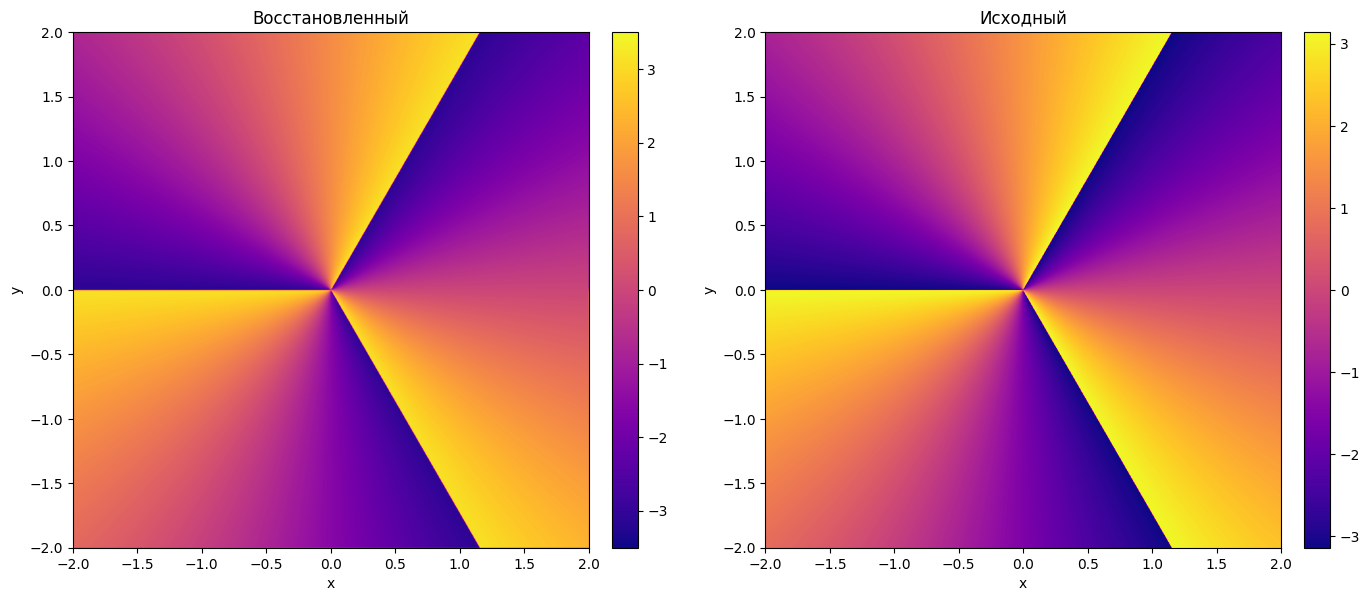

In [ ]:
# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(approx, extent=(-2, 2, -2, 2), cmap='plasma')
axs[0].set_title('Восстановленный')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(np.angle(field), extent=(-2, 2, -2, 2), cmap='plasma')
axs[1].set_title('Исходный')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
# периодические условия, почему так хорошо
# насколько шум влияет на работу методов

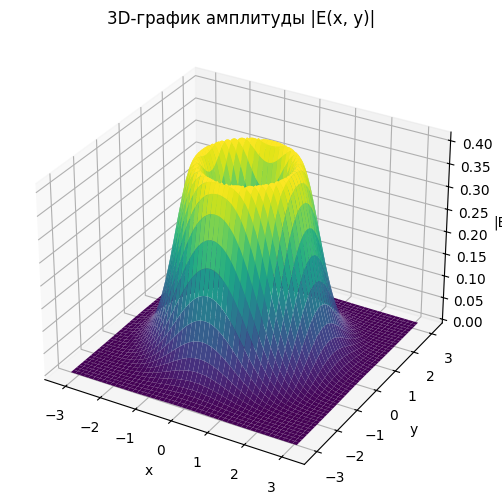

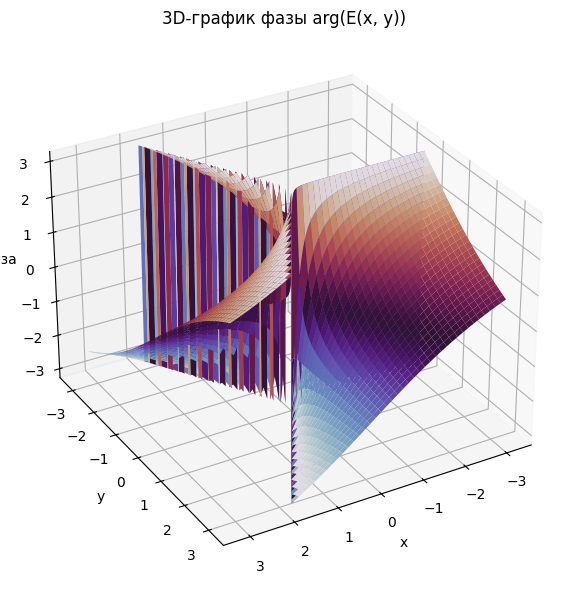

In [15]:
# ---------- 3D ПЛОТ АМПЛИТУДЫ ----------
fig3d_amp = plt.figure(figsize=(8, 6))
ax_amp = fig3d_amp.add_subplot(111, projection='3d')
ax_amp.plot_surface(X, Y, np.abs(field), cmap='viridis', linewidth=0, antialiased=True)

ax_amp.set_title('3D-график амплитуды |E(x, y)|')
ax_amp.set_xlabel('x')
ax_amp.set_ylabel('y')
ax_amp.set_zlabel('|E|')

# ---------- 3D ПЛОТ ФАЗЫ ----------
fig3d_phase = plt.figure(figsize=(8, 6))
ax_phase = fig3d_phase.add_subplot(111, projection='3d')
ax_phase.plot_surface(X, Y, np.angle(field), cmap='twilight', linewidth=0, antialiased=True)

ax_phase.view_init(30, 60)

ax_phase.set_title('3D-график фазы arg(E(x, y))')
ax_phase.set_xlabel('x')
ax_phase.set_ylabel('y')
ax_phase.set_zlabel('Фаза')

plt.tight_layout()
plt.show()